In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("D:\datasets\Salary.csv")


In [4]:
dataset

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


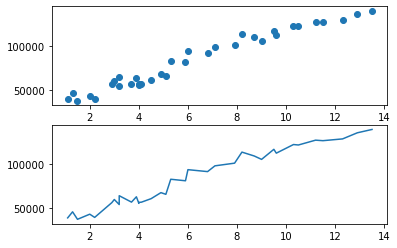

In [8]:
figure, axis = plt.subplots(2,1) 
axis[0].scatter(dataset.YearsExperience, dataset.Salary)
axis[1].plot(dataset.YearsExperience, dataset.Salary)

In [6]:
X = dataset.drop(["Salary"], axis = "columns")
Y = dataset.Salary

In [7]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [34]:
Y

0      39343
1      46205
2      37731
3      43525
4      39891
5      56642
6      60150
7      54445
8      64445
9      57189
10     63218
11     55794
12     56957
13     57081
14     61111
15     67938
16     66029
17     83088
18     81363
19     93940
20     91738
21     98273
22    101302
23    113812
24    109431
25    105582
26    116969
27    112635
28    122391
29    121872
30    127345
31    126756
32    128765
33    135675
34    139465
Name: Salary, dtype: int64

In [35]:
dataset.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [36]:
dataset.skew(axis= 0, skipna = True)

YearsExperience    0.420163
Salary             0.209005
dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


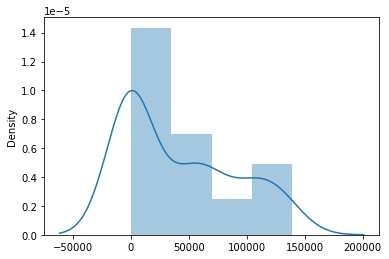

In [39]:
ax = sns.distplot(dataset)

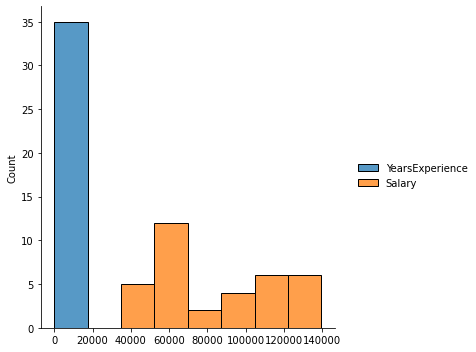

In [40]:
ax = sns.displot(dataset)

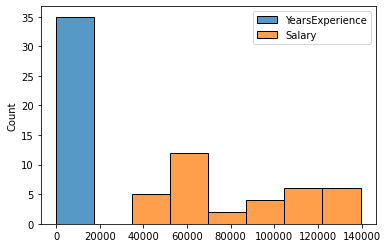

In [41]:
ax = sns.histplot(dataset)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=0)

In [44]:
X_train

,YearsExperience
2,1.5
11,4.0
27,9.6
25,9.0
34,13.5
32,12.3
26,9.5
30,11.2
8,3.2
13,4.1


In [45]:
X_train.describe()

,YearsExperience
count,28.000000
mean,6.121429
std,3.842776
min,1.100000
25%,3.150000
50%,4.900000
75%,9.125000
max,13.500000


In [54]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
# X_train = X_train.reshape(-1,1)
# Y_train = Y_train.reshape(-1,1)

In [57]:
reg1 = linear_reg.fit(X_train,Y_train)
pred1 = reg1.predict(X_test)

In [60]:
print(reg1.coef_) # reading coeficient
print(reg1.intercept_) # reading intercept

[8629.79240044]
29445.056520181286


<AxesSubplot:>

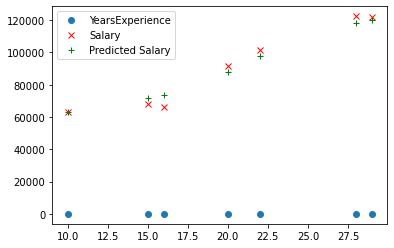

In [65]:
real_predicted = pd.concat([X_test, Y_test], axis = 1)
real_predicted.insert(loc=2, column = "Predicted Salary",value = pred1)
real_predicted.plot(style = ["o","rx", "g+"])

Text(0.5, 1.0, 'years vs Salary (Training model)')

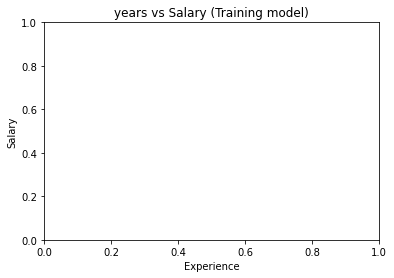

In [66]:
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("years vs Salary (Training model)")


[68279.12232215]


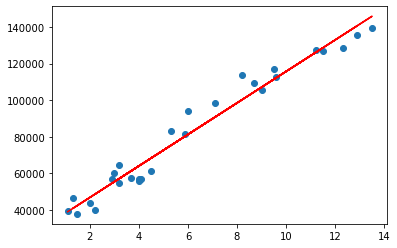

In [73]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, reg1.predict(X_train), color = "red")
print(reg1.predict([[4.5]]))